# IT326 Project - Phase2

## Raw Data

In [2]:
import pandas as pd
df = pd.read_csv('b_depressed.csv')

<ipython-input-2-4a28a99f4a35>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
display(df)

#### Duplicates:

This code confirms that the dataset has no rows that are identical copies of other rows based on all columns.

In [ ]:
duplicates_sum = df.duplicated().sum()
print(duplicates_sum)

#### Missing values:

We have 20 missing values in no_lasting_investmen column:

In [ ]:
missing_values = df.isna().sum()
print(missing_values)

#### The Variance:

##### - Low Variance Attributes:
Age, Number of Children, and Total Members: These attributes show similar values across individuals, suggesting that the group is quite uniform in terms of demographics. Most people in this dataset have comparable ages, numbers of children, and household sizes.
##### - High Variance Attributes:
Gained Asset, Durable Asset, Save Asset, Living Expenses, Other Expenses, Incoming Agricultural, Farm Expenses, Lasting Investment, and No Lasting Investment: These attributes exhibit a wide range of values, indicating significant differences in financial situations among individuals. This means that while some people have substantial wealth and savings, others may struggle financially or have very little in terms of assets and investments.

In [ ]:
variance = specific_columns.var()
print(variance);

#### Statistical Summary:
##### Show the Min, Q1, Q2, Q3, and the Max for each numeric Attribute:
###### Using summary_stats function:
- Age: We have a range of ages from 17 to 91 years, with an average of 34.77 years. The distribution is slightly skewed towards younger individuals, with 50% of the population under 30 years of age.
- Number_children: On average, individuals have about 2.88 children, ranging from 0 to 11. The majority (50%) have between 2 and 4 children, with few having more than 6.
- total_members: The average household has around 5 members, 50% of households consist of 4 to 6 members, indicating a tendency toward larger families.
- gained_asset: Individuals report an average gained asset value of about 33.6 million, with a broad range from 325,112 to nearly 100 million.
A large portion of the population has assets concentrated around the 25th to 75th percentile, from 23.3 million to 37.2 million.
- durable_asset: The mean value of durable assets (e.g., property, vehicles) is approximately 27.2 million, with a similar range to gained assets.
- save_asset: Savings assets have an average value of about 27.4 million, with a significant portion centered around 23.4 million. However, a wide range is present, from as low as 172,966 to 99.9 million.
- Living expenses: The average annual living expenses stand at 32.5 million, Most people have expenses between 20.9 million and 38.4 million.
- Other expenses: Other expenses (outside of living expenses) average 33.7 million, with a wide range from 172,966 to nearly 100 million.
- Incoming agricultural: The average agricultural income is 34.5 million, varying from 325,112 to almost 100 million. The bulk of agricultural income lies between 23.2 million and 40 million.
- Farm expenses: Farming-related expenses average 35.5 million, ranging from 271,505 to nearly 100 million.
- Lasting investment: Long-term investments average about 33 million, ranging from 74,292 to 99.4 million. 50% of the population reports investments between 20 million and 39.8 million.
- No lasting investment: The middle half of this group has assets valued between 20.6 million and 41.5 million.

In [ ]:
specific_columns = df[['Age', 'Number_children', 'total_members', 'gained_asset', 'durable_asset', 'save_asset', 'living_expenses', 'other_expenses', 'incoming_agricultural', 'farm_expenses', 'lasting_investment', 'no_lasting_investmen']]
summary_stats = specific_columns.describe()
display(summary_stats)

## Graphs & Tables

##### The pie chart shows the distribution of people classified as “Depressed” and “Not Depressed.” 

 According to the chart, 16.7% of individuals are depressed, while the remaining 83.3% are not depressed.
 This gives a quick overview of the proportions of depressed versus non-depressed individuals in the dataset.


In [ ]:
import matplotlib.pyplot as plt
# Count the occurrences of each category in the 'depressed' column
depressed_counts = df['depressed'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(depressed_counts, labels=['Not Depressed', 'Depressed'], autopct='%1.1f%%', startangle=90, colors=['silver', 'SlateGray'])
plt.title('Distribution of Depressed and Not Depressed')
plt.show()

##### Using a boxplot
We observed the distribution of education levels for two groups: "Not Depressed" (label 0) and "Depressed" (label 1). The y-axis represents education level, and the x-axis shows the class labels. The median education level is slightly higher in the "Depressed" group, though both groups have a similar spread. There are more outliers in the "Not Depressed" group at the lower end of the education level.

In [ ]:
import matplotlib.pyplot as plt

# Create the box plot using 'matplotlib'
plt.figure(figsize=(6, 4))
plt.boxplot([df[df['depressed'] == 0]['education_level'], df[df['depressed'] == 1]['education_level']], labels=['Not Depressed (0)', 'Depressed (1)'])

# Add labels and title
plt.title('Distribution of the Class Label "Depressed" based on Education level')
plt.ylabel('Education Level')
plt.xlabel('Class Labels')

# Show the plot
plt.show()


##### Using a Pie Chart to show the Relationship Between Marriage and Depression
The pie chart shows the relationship between marriage and depression. It indicates that 71.4% of depressed individuals are married.

In [ ]:

df['Married'] = df['Married'].replace({1: 'Married', 0: 'Not Married'})
depressed_df = df[df['depressed'] == 1]
marriage_count = depressed_df['Married'].value_counts()
plt.figure(figsize=(5, 5));
plt.pie(marriage_count, labels=marriage_count.index, autopct='%1.1f%%', startangle=140, colors=['MediumPurple','lavender']);
plt.title('The relationship between marraige and depression');
plt.axis('equal');
plt.show();


##### The bar chart shows the relationship between the number of children and depression status. 
It highlights that people with no children or two children appear most often in both the "Depressed" and "Not Depressed" groups. However, as the number of children increases beyond two, more individuals fall into the "Not Depressed" category. More analysis is needed to understand this relationship fully.

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram using matplotlib for the number of children by depression status
plt.figure(figsize=(10, 6))

# Create two histograms for number of children by depression status
plt.hist(df[df['depressed'] == 1]['Number_children'], bins=20, alpha=0.7, label='Depressed', align='left', rwidth=1)
plt.hist(df[df['depressed'] == 0]['Number_children'], bins=20, alpha=0.7, label='Not Depressed', align='mid', rwidth=1)

plt.title('Distribution of Number of Children by Depression Status')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Depressed Status')
plt.show()


#### The bar chart shows the distribution of age by depression status. 
In this chart, the "Not Depressed" group is more prevalent across all age ranges, with the highest concentrations appearing in individuals in their 20s and early 30s. In contrast, the "Depressed" group has fewer individuals across the entire age spectrum, though it tends to follow a similar pattern to the "Not Depressed" group, with a higher count in the 20s age range. Further analysis is required to understand the underlying factors contributing to the distribution of depression status across different ages.

In [ ]:
import matplotlib.pyplot as plt

# Create histogram using matplotlib
plt.figure(figsize=(10,6))
df[df['depressed'] == 0]['Age'].hist(bins=20, alpha=0.7, label='Not Depressed')
df[df['depressed'] == 1]['Age'].hist(bins=20, alpha=0.7, label='Depressed')


plt.title('Distribution of Age by Depression Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Depressed Status')
plt.show()

## Pre-Processing:

### Data cleaning:

#### Outlier Detection and Removal

This section implements the Interquartile Range (IQR) method to detect and visualize outliers in the specified attributes of the dataset. A boxplot is generated for each attribute to provide a visual representation of the data distribution and highlight any potential outliers. The detected outliers are then removed from the dataset to ensure cleaner and more accurate analysis.


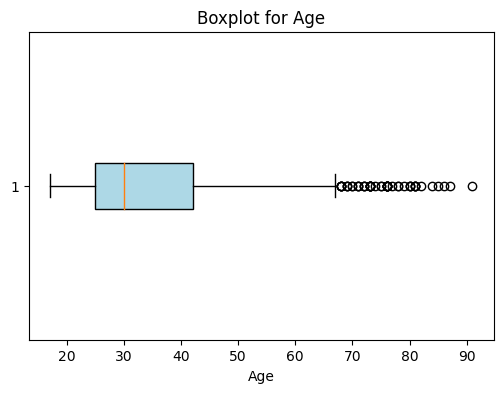

Outliers in Age:
      Age
10     84
141    69
143    75
148    74
161    69
174    85
204    76
219    72
253    70
266    73
321    76
330    81
364    86
368    68
380    91
387    72
397    80
408    69
427    68
438    78
529    73
544    81
603    81
673    87
751    71
783    81
854    73
871    76
878    76
894    80
983    78
1011   82
1080   80
1088   75
1154   68
1157   79
1172   73
1211   76
1212   73
1231   73
1236   68
1278   71
1294   68
1310   71
1315   73
1325   76
1331   70
1337   77
1345   76
1346   76
1414   72


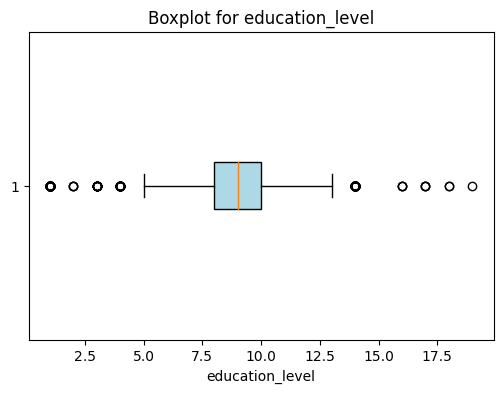

Outliers in education_level:
      education_level
10                  1
23                  4
39                  1
49                 14
58                 14
...               ...
1398               14
1413               14
1416                1
1419               14
1426                1

[214 rows x 1 columns]


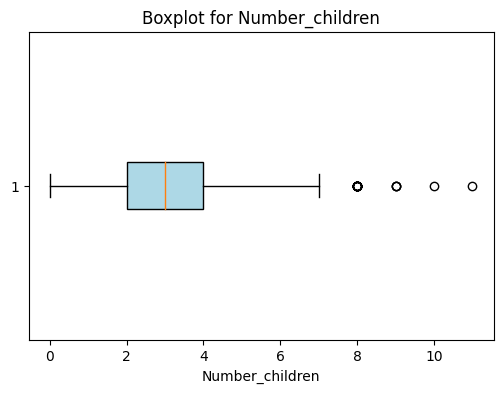

Outliers in Number_children:
      Number_children
80                  8
119                 8
187                 8
264                 8
416                 8
464                 9
526                 8
551                 8
623                 9
718                 8
730                 8
831                 8
958                10
1074                8
1100                8
1114                8
1164               11
1186                8
1192                8
1206                8
1220                9
1328                8


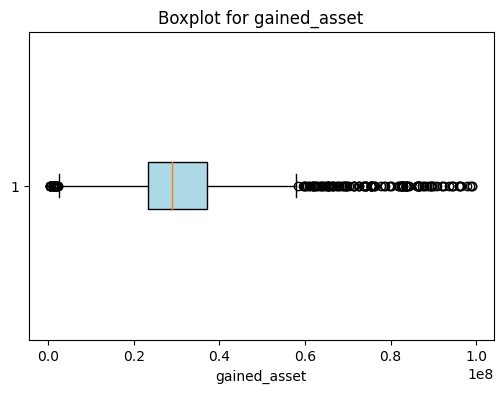

Outliers in gained_asset:
      gained_asset
4         82606287
11         1018915
14        93596368
15         1108353
19        82606287
...            ...
1389        584561
1390      66463783
1393       1169122
1403      92088379
1428      81678391

[209 rows x 1 columns]


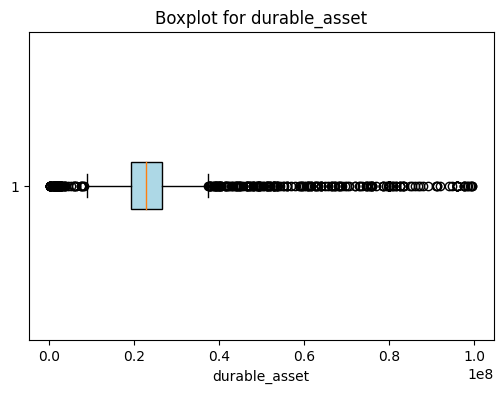

Outliers in durable_asset:
      durable_asset
5            736707
11         47245342
16         75432396
21         83440079
22          1905829
...             ...
1395       60858406
1406         736707
1410        6406148
1413       52850719
1418        2722613

[295 rows x 1 columns]


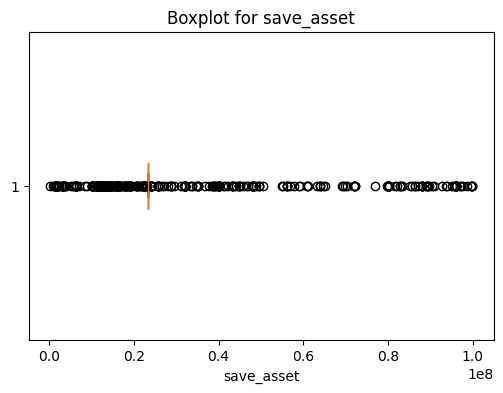

Outliers in save_asset:
      save_asset
3       49647648
7       48046108
8       80076851
14       5925687
15       1601537
...          ...
1422    14112096
1423    38868158
1425    15506558
1426    22562605
1428    47855984

[466 rows x 1 columns]


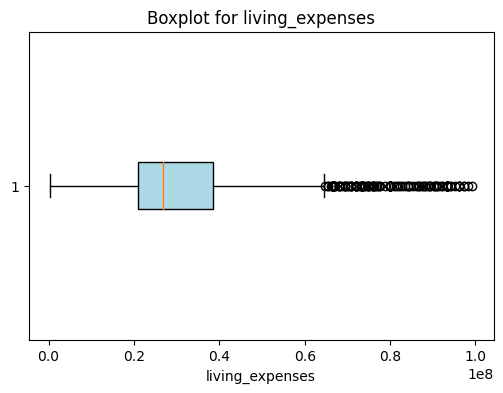

Outliers in living_expenses:
      living_expenses
4            80877619
6            66730708
7            80076849
34           77407622
49           66730708
...               ...
1398         91421068
1403         76339927
1414         96092218
1417         68278861
1423         77674545

[168 rows x 1 columns]


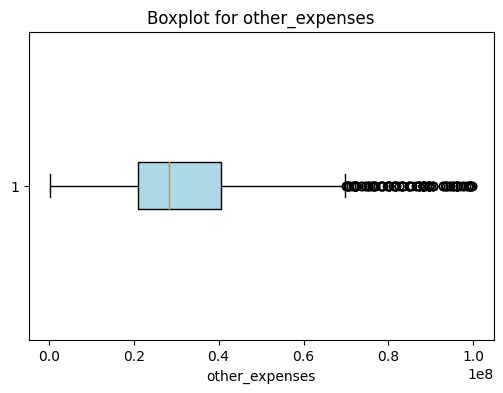

Outliers in other_expenses:
      other_expenses
4           74503502
14          72469551
19          99295292
39          88084536
44          87283764
...              ...
1360        76873775
1381        96092224
1403        75272241
1412        96892986
1425        71588707

[136 rows x 1 columns]
Data shape after outlier removal: (351, 23)


In [3]:

import matplotlib.pyplot as plt

# Load your original DataFrame
# df = pd.read_csv('your_original_dataset.csv')  # Uncomment and specify your original dataset

# Define the columns of interest, including new attributes
columns_of_interest = ['Age', 'education_level', 'Number_children', 
                       'gained_asset', 'durable_asset', 'save_asset', 
                       'living_expenses', 'other_expenses']

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Analyze and visualize outliers for all columns of interest
for col in columns_of_interest:
    # Boxplot to visualize outliers
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

    # Detect outliers
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}:")
    print(outliers[[col]])

# Apply outlier removal to all relevant columns
for col in columns_of_interest:
    df = remove_outliers(df, col)

# After removing outliers, check the shape of the cleaned data
print(f"Data shape after outlier removal: {df.shape}") 


### Data transformation:

#### Aggregation of Total Assets and Total Expenses

In this section, the attributes `gained_asset`, `durable_asset`, and `save_asset` are aggregated to create the `total_assets` variable, while `living_expenses` and `other_expenses` are combined to form the `total_expenses` variable. This transformation simplifies the dataset by reducing the number of features and providing a clearer overview of an individual's overall financial status. The resulting aggregated values enhance interpretability and facilitate more efficient analysis within the dataset.


In [20]:
aggregated_data = pd.DataFrame()

# Aggregate gained_asset, durable_asset, and save_asset into total_assets
aggregated_data['total_assets'] = df[['gained_asset', 'durable_asset', 'save_asset']].sum(axis=1)

# Aggregate living_expenses and other_expenses into total_expenses
aggregated_data['total_expenses'] = df[['living_expenses', 'other_expenses']].sum(axis=1)

# Display the aggregated DataFrame
print("Aggregated Data:")
print(aggregated_data.head())

Aggregated Data:
    total_assets  total_expenses
0       75174120        54895349
1       75174120        54895349
2       75174120        54895349
9       75174120        54895349
17      75174120        54895349


#### Normalization of Total Assets and Total Expenses

In this section, Min-Max normalization is applied to the `total_assets` and `total_expenses` variables. This technique rescales the values to a range between 0 and 1, facilitating comparisons between these financial metrics. By transforming the data in this way, we ensure that both attributes are on a consistent scale, which is essential for many machine learning algorithms and statistical analyses. This normalization process enhances the interpretability of the data and mitigates the influence of extreme values.


In [22]:
print(" total expenses and assets after using normalisation")
df['normalized_assets'] = (df['total_assets'] - df['total_assets'].min()) / (df['total_assets'].max() - df['total_assets'].min())
df['normalized_expenses'] = (df['total_expenses'] - df['total_expenses'].min()) / (df['total_expenses'].max() - df['total_expenses'].min())
print(df[['normalized_assets', 'normalized_expenses']].to_string())


 total expenses and assets after using normalisation
      normalized_assets  normalized_expenses
0                   NaN                  NaN
1                   NaN                  NaN
2                   NaN                  NaN
9                   NaN                  NaN
17                  NaN                  NaN
18                  NaN                  NaN
20                  NaN                  NaN
24                  NaN                  NaN
26                  NaN                  NaN
28                  NaN                  NaN
29                  NaN                  NaN
30                  NaN                  NaN
33                  NaN                  NaN
38                  NaN                  NaN
40                  NaN                  NaN
42                  NaN                  NaN
45                  NaN                  NaN
47                  NaN                  NaN
53                  NaN                  NaN
54                  NaN                  NaN
59

#### Age Discretization:

In this section, the `Age` attribute is discretized into three distinct categories: 'Youth', 'Adult', and 'Senior'. This transformation simplifies the analysis by grouping individuals based on age ranges. The defined age ranges are as follows:
- **Youth**: Ages 0 to 24
- **Adult**: Ages 25 to 59
- **Senior**: Ages 60 and above


In [ ]:
print("The age after discretization")

 

# Divide ages into categories

age_bins = [0, 25, 60, df['Age'].max()]  # Age intervals for discretization

age_labels = ['Youth', 'Adult', 'Senior']  # Age group labels

 

# Create a new column 'Age_Group' based on the discretization

df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

 

# Display the first 5 rows and last 5 rows while preserving the original indexes

first_five = df[['Age', 'Age_Group']].head()

last_five = df[['Age', 'Age_Group']].tail()

 

# Merge the data with a "..." row in the middle to maintain the original order

summary_df = pd.concat([first_five,

                        pd.DataFrame([['...', '...']], columns=['Age', 'Age_Group'], index=['...']),

                        last_five])

 

# Display the summarized table with the original indexes

display(summary_df)

## Feature Selection:

In [ ]:
# Count the number of features before removal

features_before = df.shape[1]

 

# Reduce the threshold for high correlation to 0.8 for example

threshold = 0.8

 

# Calculate the correlation matrix

correlation_matrix = df.corr()

 

# Plot the correlation heatmap

plt.figure(figsize=(10, 8))

plt.matshow(correlation_matrix, fignum=1)

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)

plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.colorbar()

plt.show()

 

# Identify highly correlated features

correlated_features = set()

for i in range(len(correlation_matrix.columns)):

    for j in range(i):

        if abs(correlation_matrix.iloc[i, j]) > threshold:

            colname = correlation_matrix.columns[i]

            correlated_features.add(colname)

 

# Drop highly correlated features

df_after = df.drop(labels=correlated_features, axis=1)

 

# Count the number of features after removal

features_after = df_after.shape[1]

 

# Print the results

print(f"Number of features before removal: {features_before}")

print(f"Number of features after removal: {features_after}")

print(f"Removed features: {correlated_features}")